In [ ]:
#import data manipulation libraries
import pandas as pd
import numpy as np

#import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import filter warning libraries
import warnings
warnings.filterwarnings('ignore')
! pip install imblearn
! pip install xgboost
!pip install gradio
import gradio as gr

#Import loggings
import logging
logging.basicConfig(level = logging.INFO,
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    filemode = 'w',
                    filename = 'model.log', force = True)

#Import Sci-kit Learn Libraries for model building
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

#Importing Metrics for Regression Model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [ ]:
df = pd.read_csv('/content/Fraudulent_E-Commerce_Transaction_Data_2.csv')
df.sample(frac = 1)

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
11522,be591b4a-82dd-487d-bcbe-e9930e49ab70,261780fc-71b0-4d61-bae4-cbe31b270aa9,125.88,2024-02-14 21:41:13,PayPal,home & garden,1,34,Leahside,desktop,15.64.2.101,"40457 Wilson Corners\nDouglasport, MP 71049","40457 Wilson Corners\nDouglasport, MP 71049",0,185,21
17770,68c6b7a0-5704-4fae-9a28-5d2d37fa8f32,04df7fa6-8f5a-4ba3-9e11-733b4385fc12,210.45,2024-03-08 09:29:45,debit card,health & beauty,4,45,South Nathanburgh,tablet,168.84.28.203,"732 Linda Row Suite 454\nLisaborough, AZ 58244","732 Linda Row Suite 454\nLisaborough, AZ 58244",0,59,9
22255,b469115d-e7fb-497c-92d1-6a219ba4512d,9a1d445b-852e-472c-aa06-6b5d41772939,294.93,2024-02-06 16:07:14,credit card,clothing,5,15,East Lawrence,tablet,221.196.46.231,"8961 Dixon Mountains\nPerryfurt, TX 64679","8961 Dixon Mountains\nPerryfurt, TX 64679",0,153,16
11426,b966eb71-73a6-490d-821a-ee0506dba51a,6bbe22d7-17e5-428e-a705-2ed5b0bb9d96,128.25,2024-02-09 22:31:09,debit card,electronics,3,31,West Bryanfort,desktop,25.42.124.253,189 Charles Land Apt. 236\nSouth Christopherto...,"82079 Matthew Estate\nNorth Jenniferbury, SD 8...",0,234,22
4401,6b2eb9c0-d09f-4b51-b612-ef0e76bf4bbd,f32c56ee-1e05-43ed-a207-20182efcccc3,293.87,2024-02-01 15:00:28,debit card,home & garden,5,48,West Ryanside,mobile,215.180.176.88,10413 Jennifer Pine Suite 885\nSouth Roberthav...,10413 Jennifer Pine Suite 885\nSouth Roberthav...,0,265,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9437,993452e1-2d6c-48e6-94ae-76331d8e7b7a,7676b5ee-494b-4a55-8822-19b48158abc5,189.34,2024-02-26 23:21:56,PayPal,clothing,2,43,Lake Samuel,mobile,43.224.84.63,"435 Darlene Prairie Apt. 883\nNorth Ricky, VT ...","435 Darlene Prairie Apt. 883\nNorth Ricky, VT ...",0,289,23
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
2791,49f73c00-17b5-4716-acc4-2f4c74aabb67,d8c8ea8f-af49-4ef1-b367-83f012348b3d,268.88,2024-01-29 06:06:43,credit card,electronics,2,31,New Austinstad,tablet,203.214.159.19,"742 Susan Parkways Apt. 962\nMatthewport, MT 6...","742 Susan Parkways Apt. 962\nMatthewport, MT 6...",0,17,6
18289,9a87bc0b-fbb7-41ba-9b0b-1cf1af23df00,57ec039b-929a-4540-8876-593076a65c23,141.46,2024-01-12 06:00:27,debit card,electronics,5,46,Lake Carolmouth,tablet,4.183.13.43,"54397 Kelly Plain\nFrancoside, WA 98008","54397 Kelly Plain\nFrancoside, WA 98008",0,80,6


In [ ]:
#Dataset informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction ID      23634 non-null  object 
 1   Customer ID         23634 non-null  object 
 2   Transaction Amount  23634 non-null  float64
 3   Transaction Date    23634 non-null  object 
 4   Payment Method      23634 non-null  object 
 5   Product Category    23634 non-null  object 
 6   Quantity            23634 non-null  int64  
 7   Customer Age        23634 non-null  int64  
 8   Customer Location   23634 non-null  object 
 9   Device Used         23634 non-null  object 
 10  IP Address          23634 non-null  object 
 11  Shipping Address    23634 non-null  object 
 12  Billing Address     23634 non-null  object 
 13  Is Fraudulent       23634 non-null  int64  
 14  Account Age Days    23634 non-null  int64  
 15  Transaction Hour    23634 non-null  int64  
dtypes: f

<Axes: >

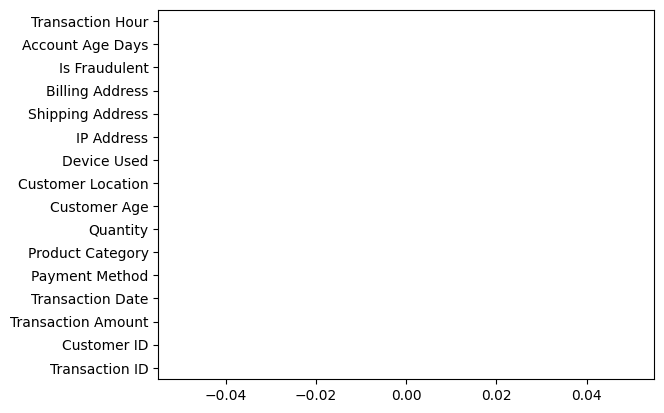

In [ ]:
#Checking Null Values stats using Graphical method
df.isnull().sum().plot(kind = 'barh')

In [ ]:
#Evaluate Descriptive stats: EDA

# Step 1: Sagregate Categorical columns nd Numerical
categorical_col = df.select_dtypes(include = 'object')
numerical_col = df.select_dtypes(include = ['int64','float64']) #or exclude = 'object'

In [ ]:
# Exploratory Data Analysis
# Univariate Analysis
# Descriptive statistics for numerical columns
stats = []

from collections import OrderedDict

for i in numerical_col.columns:
    numerical_stats = OrderedDict({
        'Feauture' : i,
        'Count' : df[i].count(),
        'Mean' : df[i].mean(),
        'Median' : df[i].median(),
        'Mode' : df[i].mode()[0],
        'Minimum' : df[i].min(),
        'Maximum' : df[i].max(),
        'Q1' : df[i].quantile(0.25),
        'Q3' : df[i].quantile(0.75),
        'IQR' : df[i].quantile(0.75) - df[i].quantile(0.25), #IQR cannot be 0
        'Std' : df[i].std(),
        'skewness' : df[i].skew(), #positive skewness (right skew), negative skewness (left skew), and zero skewness (symmetrical distribution, i.e. normal data)
        'kurtosis' : df[i].kurtosis(), # mesokurtic, leptokurtic, and platykurtic.
        'Variance' : df[i].var(), #spread of data
        'Standard Deviation' : df[i].std() # distance between mean and data point, under root variance
    })

    stats.append(numerical_stats)
    report = pd.DataFrame(stats)
report

,Feauture,Count,Mean,Median,Mode,Minimum,Maximum,Q1,Q3,IQR,Std,skewness,kurtosis,Variance,Standard Deviation
0,Transaction Amount,23634,229.367099,151.415,10.42,10.0,9716.5,69.07,296.1275,227.0575,282.046669,6.696741,109.712875,79550.323489,282.046669
1,Quantity,23634,3.000550,3.000,5.00,1.0,5.0,2.00,4.0000,2.0000,1.419663,0.005508,-1.308888,2.015444,1.419663
2,Customer Age,23634,34.560210,35.000,33.00,-2.0,73.0,28.00,41.0000,13.0000,10.009471,-0.013832,-0.015862,100.189516,10.009471
3,Is Fraudulent,23634,0.051705,0.000,0.00,0.0,1.0,0.00,0.0000,0.0000,0.221436,4.049325,14.398250,0.049034,0.221436
4,Account Age Days,23634,178.660531,178.000,12.00,1.0,365.0,84.00,272.0000,188.0000,107.388682,0.023367,-1.228818,11532.329093,107.388682
5,Transaction Hour,23634,11.266015,11.000,0.00,0.0,23.0,5.00,17.0000,12.0000,6.980659,0.033876,-1.224502,48.729597,6.980659


In [ ]:
df['Is Fraudulent'].value_counts()

,count
Is Fraudulent,
0,22412
1,1222


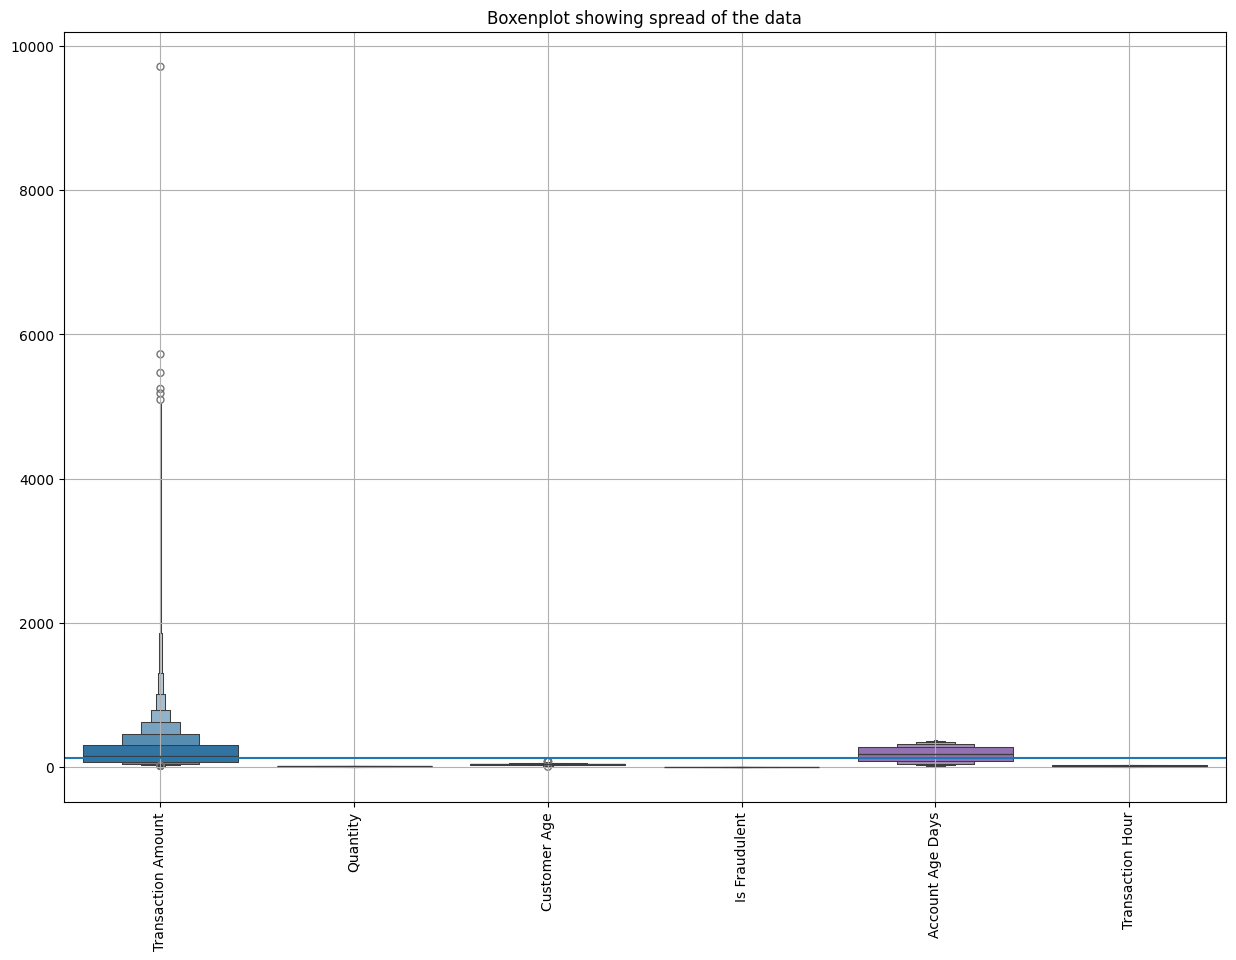

In [ ]:
plt.figure (figsize = (15,10))
sns.boxenplot(df)
plt.axhline(120)
plt.xticks(rotation = 90)
plt.title('Boxenplot showing spread of the data')
plt.grid()
plt.show()

Text(0.5, 1.0, 'Heatmap showing Correlation w.r.t. Target Column')

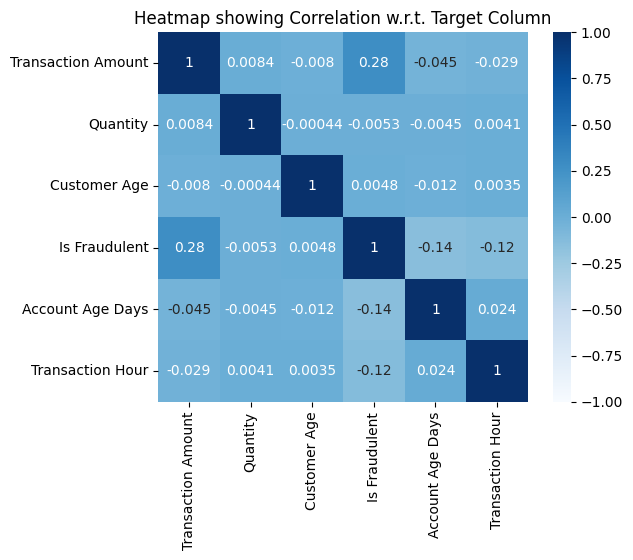

In [ ]:
#last col of heatmap must be TARGET COLUMN
sns.heatmap(numerical_col.corr(), cbar=True, square=True, annot=True, center = 0, vmax = 1, vmin= -1, cmap='Blues')
plt.title('Heatmap showing Correlation w.r.t. Target Column')

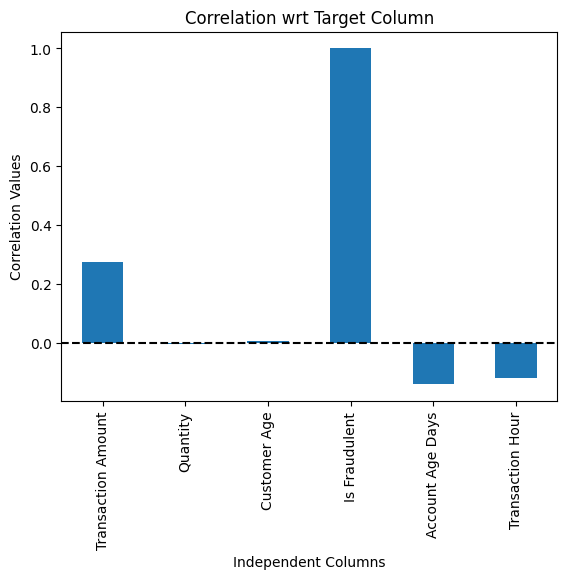

In [ ]:
numerical_col.corr()['Is Fraudulent'].plot(kind = 'bar')
plt.axhline(0, linestyle = '--', color = 'black') #horizontal line
plt.title('Correlation wrt Target Column')
plt.ylabel('Correlation Values')
plt.xlabel('Independent Columns')
plt.show()

In [ ]:
!pip install statsmodels

In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
# Drop the target variable
numerical_features = df.select_dtypes(include='number').drop(columns=['Is Fraudulent'])

# Step 1: Replace inf/-inf with NaN
numerical_features.replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 2: Drop rows with NaN
numerical_features.dropna(inplace=True)

# Step 3: Calculate VIF
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['features'] = dataset.columns
    vif['VIF_Values'] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
    vif['VIF_Values'] = round(vif['VIF_Values'], 2)
    vif = vif.sort_values(by='VIF_Values', ascending=False)
    return vif

# Run VIF
vif_report = calculate_vif(numerical_features)
vif_report

,features,VIF_Values
2,Customer Age,6.32
1,Quantity,4.44
3,Account Age Days,3.31
4,Transaction Hour,3.23
0,Transaction Amount,1.60


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Apply label encoding to all categorical columns
for col in categorical_col.columns:
    if col != 'Is Fraudulent':  # Don't encode target if it's string
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        print(f"Encoded column: {col}")

In [ ]:
#Preventing Data Leakage

# Step 01: Split the dataset in X and y
# Where X: Independent Column and y: Dependent Column : Target column
X = df.drop(columns = ['Is Fraudulent'],axis = 1) # drops inside X, but presnt in df
y = df['Is Fraudulent'] # drops inside y, but presnt in df

# Step 02: Using Train Test Split
#test_size lies between 0.20 to 0.35(20-30 is enough)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state = 42)

# Step 3:

from imblearn.over_sampling import SMOTE,ADASYN,SMOTENC
# from imblearn.under_sampling import AllKNN,ClusterCentroids

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train) #we do sampling on training data
print(y_train.value_counts())

Is Fraudulent
1    15689
0    15689
Name: count, dtype: int64


In [ ]:
# Step 03: Using Scaling Technique
sc = MinMaxScaler()

#Seen data
X_train = sc.fit_transform(X_train)

# Unseen Data
X_test = sc.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA

# Try keeping 95% variance
pca = PCA(n_components=4) #if its 0-1 then taking variance, other than 1 is parameter
x_pca = pca.fit_transform(X_train)

print(f"Original shape: {X_train.shape}")
print(f"Transformed shape: {x_pca.shape}")

Original shape: (31378, 15)
Transformed shape: (31378, 4)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RF = RandomForestClassifier().fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)

print('The Model Accuracy for the Random Forest Classifier: ',accuracy_score(y_test,y_pred_RF))

The Model Accuracy for the Random Forest Classifier:  0.8870399097447469


In [ ]:
from xgboost import XGBClassifier

XGB = XGBClassifier(random_state = 42).fit(X_train, y_train)
y_pred_XGB = XGB.predict(X_test)

print(f'The Accuracy score for XGBoost:', accuracy_score(y_test, y_pred_XGB))

The Accuracy score for XGBoost: 0.8749118601043576


In [ ]:
!pip install catboost

from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)

y_pred_cat = cat_model.predict(X_test)

print(f'The Accuracy score for CatBoost:', accuracy_score(y_test, y_pred_cat))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.8 MB/s eta 0:00:00
The Accuracy score for CatBoost: 0.8774502890988577


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Initialize the classifier model
RF = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for classification
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=RF,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='accuracy',  # For classification tasks
    random_state=42,
    n_jobs=-1
)

# Fit model to training data
random_search.fit(X_train, y_train)

# Best model after tuning
best_rf = random_search.best_estimator_

# Evaluation on test data
y_pred = best_rf.predict(X_test)
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy on CV:", random_search.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best Accuracy on CV: 0.9287724106759704
Test Accuracy: 0.8867578620786913


In [ ]:
!pip install joblib
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Random Forest
RF = RandomForestClassifier().fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_RF))

# K-Nearest Neighbors
KNN = KNeighborsClassifier().fit(X_train, y_train)
y_pred_KNN = KNN.predict(X_test)
print('KNN Accuracy:', accuracy_score(y_test, y_pred_KNN))

# AdaBoost
ADA = AdaBoostClassifier().fit(X_train, y_train)
y_pred_ADA = ADA.predict(X_test)
print('AdaBoost Accuracy:', accuracy_score(y_test, y_pred_ADA))

# Gradient Boosting
GB = GradientBoostingClassifier().fit(X_train, y_train)
y_pred_GB = GB.predict(X_test)
print('Gradient Boosting Accuracy:', accuracy_score(y_test, y_pred_GB))


Random Forest Accuracy: 0.885629671414469
KNN Accuracy: 0.7048371174728529
AdaBoost Accuracy: 0.7815540826399662
Gradient Boosting Accuracy: 0.8098998730785503


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Initialize the XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Fit the model to training data
random_search.fit(X_train, y_train)

# Get the best model
best_xgb = random_search.best_estimator_

# Make predictions on test set
y_pred = best_xgb.predict(X_test)

# Print evaluation metrics
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy on CV:", random_search.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 0.6, 'reg_lambda': 2, 'reg_alpha': 0.01, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 1.0}
Best Accuracy on CV: 0.9586337987755797
Test Accuracy: 0.9128472711888309


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

# Initialize the model
gbc = GradientBoostingClassifier(random_state=42)

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gbc,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Fit the model
random_search.fit(X_train, y_train)

# Best tuned model
best_gbc = random_search.best_estimator_

# Cross-validation accuracy on training set
cv_scores = cross_val_score(best_gbc, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy (Train):", cv_scores.mean())

# Evaluate on test data
y_pred = best_gbc.predict(X_test)
print("Best Hyperparameters:", random_search.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


In [ ]:
df.columns


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
import joblib

# Load dataset
df = pd.read_csv("Fraudulent_E-Commerce_Transaction_Data_2.csv")

# Create Same_Address column
df["Same_Address"] = (df["Shipping Address"] == df["Billing Address"]).astype(int)

# Label encode categorical features
le = LabelEncoder()
df["Payment Method"] = le.fit_transform(df["Payment Method"])
df["Device Used"] = le.fit_transform(df["Device Used"])

# Select useful features
selected_features = [
    'Transaction Amount',
    'Payment Method',
    'Device Used',
    'Account Age Days',
    'Transaction Hour',
    'Same_Address'
]

X = df[selected_features]
y = df["Is Fraudulent"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Handle imbalance
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# Scale
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Save artifacts
joblib.dump(model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(selected_features, "feature_columns.pkl")

print("Training complete! Artifacts saved.")


In [ ]:
import gradio as gr
import pandas as pd
import joblib

# Load model artifacts
model = joblib.load("best_model.pkl")
scaler = joblib.load("scaler.pkl")
feature_columns = joblib.load("feature_columns.pkl")

# Prediction function
def predict_fraud(amount, payment_method, device_used, account_age, hour, same_address):
    input_df = pd.DataFrame([[amount, payment_method, device_used, account_age, hour, same_address]],
                            columns=feature_columns)
    input_scaled = scaler.transform(input_df)
    pred = model.predict(input_scaled)[0]
    return " Fraudulent" if pred == 1 else "Legitimate"

# Gradio UI
inputs = [
    gr.Number(label="Transaction Amount"),
    gr.Number(label="Payment Method (encoded)"),
    gr.Number(label="Device Used (encoded)"),
    gr.Number(label="Account Age (days)"),
    gr.Number(label="Transaction Hour (0–23)"),
    gr.Radio([0, 1], label="Same Address? (1 = Yes, 0 = No)")
]

gr.Interface(
    fn=predict_fraud,
    inputs=inputs,
    outputs="text",
    title=" E-Commerce Fraud Detection (Simplified)"
).launch()


In [ ]:
!pip install -q gradio huggingface_hub


In [ ]:
from huggingface_hub import notebook_login

notebook_login()


In [ ]:
import os
os.makedirs("fraud_detector", exist_ok=True)

# Save model files (if not already saved)
import joblib
joblib.dump(model, "fraud_detector/best_model.pkl")
joblib.dump(scaler, "fraud_detector/scaler.pkl")
joblib.dump(feature_columns, "fraud_detector/feature_columns.pkl")


In [ ]:
app_code = '''
import gradio as gr
import pandas as pd
import joblib

model = joblib.load("best_model.pkl")
scaler = joblib.load("scaler.pkl")
feature_columns = joblib.load("feature_columns.pkl")

def predict_fraud(amount, payment_method, device_used, account_age, hour, same_address):
    input_df = pd.DataFrame([[amount, payment_method, device_used, account_age, hour, same_address]],
                            columns=feature_columns)
    input_scaled = scaler.transform(input_df)
    pred = model.predict(input_scaled)[0]
    return " Fraudulent" if pred == 1 else " Legitimate"

inputs = [
    gr.Number(label="Transaction Amount"),
    gr.Number(label="Payment Method (encoded)"),
    gr.Number(label="Device Used (encoded)"),
    gr.Number(label="Account Age (days)"),
    gr.Number(label="Transaction Hour (0–23)"),
    gr.Radio([0, 1], label="Same Address? (1 = Yes, 0 = No)")
]

gr.Interface(fn=predict_fraud, inputs=inputs, outputs="text", title="🛒 E-Commerce Fraud Detection (Simplified)").launch()
'''
with open("fraud_detector/app.py", "w") as f:
    f.write(app_code)


In [ ]:
reqs = '''
gradio
pandas
scikit-learn
joblib
'''
with open("fraud_detector/requirements.txt", "w") as f:
    f.write(reqs)


In [ ]:
from huggingface_hub import create_repo, upload_folder

# Create your space (only run once)
create_repo("ecommerce-fraud-detector", repo_type="space", space_sdk="gradio")

# Upload local folder to space
upload_folder(
    folder_path="fraud_detector",
    repo_id="https://github.com/anirudhakolay/Fradulent_E-commerce_Transaction_ClassificationModel.git",
    repo_type="space"
)


In [ ]:
import os
import shutil
import joblib

os.makedirs("fraud_detector", exist_ok=True)

# Copy model files (you should already have these in Colab)
shutil.copy("best_model.pkl", "fraud_detector/")
shutil.copy("scaler.pkl", "fraud_detector/")
shutil.copy("feature_columns.pkl", "fraud_detector/")


In [ ]:
app_code = '''
import gradio as gr
import pandas as pd
import joblib

model = joblib.load("best_model.pkl")
scaler = joblib.load("scaler.pkl")
feature_columns = joblib.load("feature_columns.pkl")

def predict_fraud(amount, payment_method, device_used, account_age, hour, same_address):
    input_df = pd.DataFrame([[amount, payment_method, device_used, account_age, hour, same_address]],
                            columns=feature_columns)
    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled)[0]
    return "Fraudulent Transaction" if prediction == 1 else "Legitimate Transaction"

inputs = [
    gr.Number(label="Transaction Amount"),
    gr.Number(label="Payment Method (encoded)"),
    gr.Number(label="Device Used (encoded)"),
    gr.Number(label="Account Age (days)"),
    gr.Number(label="Transaction Hour (0–23)"),
    gr.Radio([0, 1], label="Same Address? (1 = Yes, 0 = No)")
]

gr.Interface(fn=predict_fraud, inputs=inputs, outputs="text", title="Fraud Detection App").launch()
'''
with open("fraud_detector/app.py", "w") as f:
    f.write(app_code)


In [ ]:
requirements = '''
gradio
pandas
scikit-learn
joblib
'''
with open("fraud_detector/requirements.txt", "w") as f:
    f.write(requirements)


In [ ]:
from huggingface_hub import create_repo, upload_folder

# Create a space (only run once!)
create_repo("ecommerce-fraud-detector", repo_type="space", space_sdk="gradio")

# Upload your project folder to your space
upload_folder(
    folder_path="fraud_detector",
    repo_id="anirudhakolay/ecommerce-fraud-detector",
    repo_type="space"
)


In [ ]:
from huggingface_hub import upload_folder

upload_folder(
    folder_path="fraud_detector",
    repo_id="anirudhakolay/ecommerce-fraud-detector",
    repo_type="space"
)


In [ ]:
# Let's generate a sample README.md, improve the UI with dropdowns, and get ready to update the Space
import os

# Make sure the directory exists
os.makedirs("fraud_detector", exist_ok=True)

# Sample README.md content for Hugging Face Space
readme = """
# E-Commerce Fraud Detection App

This Gradio app uses a machine learning model (Gradient Boosting Classifier) to classify whether an e-commerce transaction is **fraudulent** or **legitimate**.

## Features Used
- Transaction Amount
- Payment Method (encoded)
- Device Used (encoded)
- Account Age (days)
- Transaction Hour (0–23)
- Same Address? (1 = Yes, 0 = No)

## Model
- Gradient Boosting Classifier
- Preprocessed with MinMaxScaler
- SMOTE used for class balancing

## How to Use
1. Enter the required input values.
2. Click “Submit”.
3. See whether the transaction is fraudulent or legitimate.

##  Run Locally

```bash
pip install -r requirements.txt
python app.py


In [ ]:
from google.colab import files

files.download("fraud_detector/app.py")
files.download("fraud_detector/requirements.txt")
files.download("fraud_detector/README.md")
files.download("fraud_detector/best_model.pkl")
files.download("fraud_detector/scaler.pkl")
files.download("fraud_detector/feature_columns.pkl")


In [ ]:
git clone https://github.com/anirudhakolay/Fradulent_E-commerce_Transaction_ClassificationModel.git
cd Fradulent_E-commerce_Transaction_ClassificationModel

# Move downloaded files here
# Then:
git add .
git commit -m "Add Gradio app with model files"
git push
